<a href="https://colab.research.google.com/github/HJoon-K/Find_Dust/blob/kim/04%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dustdata/seoul_dust1620.csv')
df.drop('연도', axis=1, inplace=True)
df.head()

,자치구,미세먼지나쁨일수,공원율,도로율,가로수량
0,강남구,90,0.167034,0.2346,23654
1,강남구,84,0.166874,0.2346,23729
2,강남구,64,0.166874,0.2347,23451
3,강남구,65,0.166940,0.2358,23349
4,강동구,87,0.137641,0.2350,16414


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
lr = LinearRegression()

In [ ]:
for feature in df.columns[2: ]:
    X = df[feature].values.reshape((-1,1))
    lr.fit(X, df['미세먼지나쁨일수'])
    score = lr.score(X,df['미세먼지나쁨일수'])
    print(f'{feature} : {score:.4f} \t{lr.coef_} \t{lr.intercept_}')

공원율 : 0.0395 	[-17.87708546] 	76.14435174260664
도로율 : 0.1315 	[149.40489666] 	37.48938068856266
가로수량 : 0.0171 	[0.00035327] 	67.33027379821921


In [ ]:
df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dustdata/seoul_dust2019.csv')
df19.head()

,자치구,미세먼지나쁨일수,공원율,도로율,연도,가로수량
0,강남구,65,0.166940,0.2358,2019,23349
1,강동구,70,0.137039,0.2428,2019,17152
2,강북구,67,0.607725,0.2091,2019,7789
3,강서구,69,0.105471,0.2683,2019,13719
4,관악구,76,0.371230,0.2541,2019,10154


In [ ]:
for feature in df19.columns[2: ]:
    X = df19[feature].values.reshape((-1,1))
    lr.fit(X, df19['미세먼지나쁨일수'])
    score = lr.score(X,df19['미세먼지나쁨일수'])
    print(f'{feature} : {score:.4f} \t{lr.coef_} \t{lr.intercept_}')

공원율 : 0.1160 	[-24.57171346] 	72.7961290289106
도로율 : 0.1860 	[138.33127172] 	34.66205847886367
연도 : 0.0000 	[0.] 	66.32
가로수량 : 0.1266 	[0.00076602] 	57.37706582770144


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dustdata/seoul_dust1619.csv')
df.head()

,자치구,연도,미세먼지나쁨일수,공원율,도로율,가로수량
0,강남구,2016,90,0.167034,0.2346,23654
1,강남구,2017,84,0.166874,0.2346,23729
2,강남구,2018,64,0.166874,0.2347,23451
3,강남구,2019,65,0.166940,0.2358,23349
4,강동구,2016,87,0.137641,0.2350,16414


In [ ]:
for feature in df.columns[2: ]:
    X = df[feature].values.reshape((-1,1))
    lr.fit(X, df['미세먼지나쁨일수'])
    score = lr.score(X,df['미세먼지나쁨일수'])
    print(f'{feature} : {score:.4f} \t{lr.coef_} \t{lr.intercept_}')

미세먼지나쁨일수 : 1.0000 	[1.] 	1.4210854715202004e-14
공원율 : 0.0395 	[-17.87708546] 	76.14435174260664
도로율 : 0.1315 	[149.40489666] 	37.48938068856266
가로수량 : 0.0171 	[0.00035327] 	67.33027379821921


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = df19.loc[:,['도로율','공원율']]
target = df19.loc[:,['자치구']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도로율     25 non-null     float64
 1   공원율     25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [ ]:
sils = []
ints = []

for i in range(2, 10+1):
    kms = KMeans(n_clusters=i)
    kms.fit(data)
    ss = silhouette_score(data, kms.labels_, metric='euclidean')
    el = kms.inertia_
    
    sils.append(ss)
    ints.append(el)

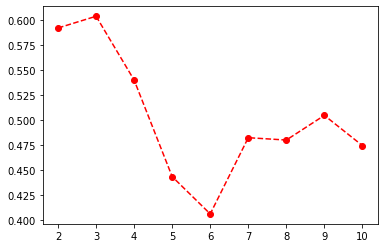

In [ ]:
# 실루엣 계수 시각화
plt.plot(range(2, 10+1), sils, 'ro--')
plt.show()

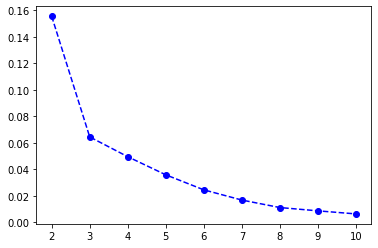

In [ ]:
# 엘보우 계수 시각화
plt.plot(range(2, 10+1), ints, 'bo--')
plt.show()

In [ ]:
kms = KMeans(n_clusters=3, random_state=2209081630)
kms.fit(data)

KMeans(n_clusters=3, random_state=2209081630)

In [ ]:
kms.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1,
       1, 2, 2], dtype=int32)

In [ ]:
silhouette_score(data, kms.labels_, metric='euclidean')

0.6041711299436977

In [ ]:
kms.inertia_

0.0644725008660079

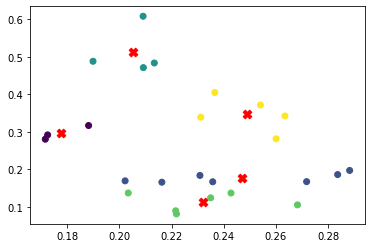

In [ ]:
centers = pd.DataFrame(kms.cluster_centers_, columns=['rd','pk'])
x, y = centers.rd, centers.pk

plt.scatter(np.array(data.iloc[:,0]), np.array(data.iloc[:,1]), c=kms.labels_) 
plt.scatter(x, y, s=75,  marker='X', c='r') # 중심점 표시
plt.show()

In [ ]:
import plotly.express as px
df19 = df19.sort_values('미세먼지나쁨일수', ascending=False)

fig = px.scatter(df19, x="도로율", y="공원율", color="자치구",
                 size='미세먼지나쁨일수', height=700, width=800)

fig.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data,target)
knn.score(data, target)        

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.44

ValueError: ignored